In [95]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import random


In [96]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999,inplace=True)

df.drop(['id'],1,inplace=True) #id is not relevant to class(result) at all
print(df.head(2))

   clump_thickness  uniformity_of_cell_size  uniformilty_of_cell_shape  \
0                5                        1                          1   
1                5                        4                          4   

   marginal_adhesion  single_epithelial_cell_size bare_nuclei  \
0                  1                            2           1   
1                  5                            7          10   

   bland_chromatin  normal_nucleoli  mitoses  class  
0                3                1        1      2  
1                3                2        1      2  


In [97]:
X = np.array(df.drop(['class'],1)) # input parameter
y = np.array(df['class']) # result

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split into train(80%) and test(20%)

In [99]:
clf = neighbors.KNeighborsClassifier() #initialise classifier
clf.fit(X_train,y_train) # apply classifier by inject train dataset, train data find model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
# inject input(x_test), compare output(y) with result(y_test) to classfier model to see how accurate or confident
accuracy = clf.score(X_test,y_test) 
print("accuracy by LinearRegression: ", accuracy)

accuracy by LinearRegression:  0.9928571428571429


In [101]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
prediciton = clf.predict(example_measures)
print("prediction by LinearRegression: ", prediciton)

prediction by LinearRegression:  [2 2]


In [102]:
#svm pt.20, test svm against LinearRegression
from sklearn import svm
clf2 = svm.SVC()
clf2.fit(X_train,y_train)
accuracy_svm = clf2.score(X_test,y_test)
print("accuray by svm: ", accuracy_svm)
# make prediction by giving array
prediciton_by_svm = clf2.predict(example_measures)
print("prediction by svm: ", prediciton_by_svm)


accuray by svm:  0.9571428571428572
prediction by svm:  [2 2]


/home/jia/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [103]:
# Eculidean Distance caculation, hard code to two dimentional array- pt.15
from math import sqrt
plot1 = [1,3]
plot2 = [2,5]
eculidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
print(eculidean_distance)

2.23606797749979


In [104]:
#pt.16-pt.17
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings

style.use('fivethirtyeight')

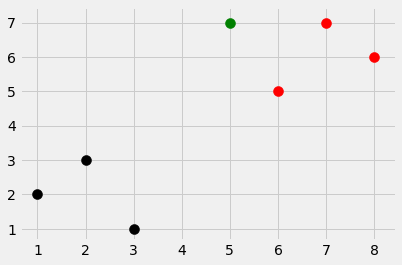

In [105]:
# basic classifier example and new point
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
#[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]

plt.scatter(new_features[0],new_features[1],s=100,color='g')
plt.show()

In [106]:
#knn function, input(dataset,predict_dataset,k), output(class,confidence)
def k_nearest_neighbors(data,predit,k=3):
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            #eculidean_distance = sqrt( (features[0]-features[0])**2 + (features[1]-features[1])**2 )
            eculidean_distance = np.linalg.norm(np.array(features)-np.array(predit))
            distances.append([eculidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1)[0][0])
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    #print(vote_result, confidence)
    
    return vote_result, confidence

In [107]:
#apply data from In [87] to knn function
result, confidence= k_nearest_neighbors(dataset,new_features,k=3)
print(result, confidence)

r 1.0


In [108]:
#pt.19
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)
#print(df.head)
full_data = df.astype(float).values.tolist()
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [109]:
random.shuffle(full_data)
print(20*'#')
print(full_data[:5])


####################
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 10.0, 10.0, 10.0, 6.0, 10.0, 6.0, 5.0, 2.0, 4.0], [4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0]]


In [110]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

#print(train_set)

In [111]:
for i in train_data:
    #print(i[-1],i[0],i[1]) #i[-1] is last column which is class 2 or 4
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [112]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        #print(data)
        #print(group)
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
print('Accuracy', correct/total)

0.6
0.8
1.0
Accuracy 0.9784172661870504
